# Определение закономерностей успешной компьютерной игры

**Цель проекта:** выявить определяющие успешность игры закономерности для определения потенциально популярного продукта. Планировка рекламной кампании на 2017.

**Предоставлены данные:** Для проведения исследования были предоставлены данные о количестве проданных копий 16715 игр, вышедших в период с 1980 по 2016 г. Исходный файл в формате csv. Описание:
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

**План исследования:**
1. Подготовка данных: 
    * исследование типов данных, заполнение пропусков, поиск аномалий.


2. Исследовательский анализ данных:
    * определение актуального периода для целей исследования;
    * оценка динамики продаж потенциально прибыльных платформ;
    * оценка влияния отзывов критиков и пользователей на продажи;
    * анализ прибыльности жанров.

    
3. Составление портрета пользователя: 
    * топ-5 платформ для регионов Северной Америки, Европы и Японии;
    * топ-5 жанров в регионах Северной Америки, Европы и Японии;
    * влияние рейтинга ESRB в регионах Северной Америки, Европы и Японии.


4. Выдвижение и проверка гипотез.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
try:
    df = pd.read_csv('games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')    

## Подготовка данных

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
#названия столбцов к нижнему регистру
df.columns = map(str.lower, df.columns)

In [4]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Замечания**

Данные о годе выпуска представлены в виде дробрых чисел. Необходимо произвести преобразование в целое число.

Оценка критиков вероятно целое число, для замены формата необходимо проверить данные.

Оценку пользователей необходимо преобразовать в дробные числа.

In [5]:
#проверка оценок критиков
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [6]:
#проверка оценок пользователей
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [7]:
len(df.loc[df['user_score'] == 'tbd']) / len(df)

0.1450194436135208

Данные об оценке содержат как целые, так и дробные значения, а так же 1 буквенное - "tbd". Вероятно, tbd - это аббревиатура To Be Determined - это значит, что оценок пока слишком мало, чтобы вывести рейтинг. Значений с таким рейтингом 14,5% - возможно это существенная характеристика. Чтобы привести данные в столбце к единому формату - дробного числа - преобразуем "tbd" в уникальное числовое значение, не оказывающего большого влияния на данные - 0.01. 

In [8]:
#замена "tbd" на 0.01
df.loc[df['user_score'] == 'tbd', 'user_score'] = 0.01
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 0.01, '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [9]:
#преобразование в дробные числа
df['user_score'] = df['user_score'].astype('float')

In [10]:
#Замена пропусков рейтинга ассоциации ESRB на NA
df['rating'] = df['rating'].fillna('NA')

In [11]:
#преобразование года в целое число
df['year_of_release'] = df['year_of_release'].astype('Int32')

#преобразование рейтинга ESRB в категории для дальнейшего удобства

df['rating'] = df['rating'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16715 non-null  object  
 2   year_of_release  16446 non-null  Int32   
 3   genre            16713 non-null  object  
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     8137 non-null   float64 
 9   user_score       10014 non-null  float64 
 10  rating           16715 non-null  category
dtypes: Int32(1), category(1), float64(6), object(3)
memory usage: 1.2+ MB


In [12]:
#дубликаты
df.duplicated().sum()

0

In [13]:
#неявные дубликаты
df[df.duplicated(subset=['name', 'platform', 'year_of_release'])] #неявные дубликаты по данным о продажах

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NA
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


In [14]:
df = df.drop_duplicates(subset=['name', 'platform', 'year_of_release'])

Обнаружено 2 дубликата, удалены.

In [15]:
#пропуски
df.isna().sum().sort_values(ascending=False)

critic_score       8577
user_score         6700
year_of_release     269
name                  1
genre                 1
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
rating                0
dtype: int64

**Пропуски**
Данные о названии, годе выпуска, жанре, рейтинге критиков, рейтиннге пользователей и рейтинге организации содержат пропуски.

Пропуск названия - вероятная причина - сбой при выгрузке данных в файл csv, возможно название содержит нестандартные символы.

Пропуск жанра - жанр не указан размещающим игру.

Вероятная причина пропусков в данных о годе выпуска - год неизвестен. Это возможно в случае игры, которая ещё не вышла - маловероятно в данном случае. Официальные даты выпуска могут отличаться в разных странах - возможно в этом случае возникла ошибка заполнения. Также возможно, что год не проставлен человеком, составлявшим описание. Необходимо уточнить, как заполняются данные.

Оценка критиков - данные об оценке отсутствуют по какой-либо причине.

Оценка пользователей - данные об оценке отсутствуют по какой-то причине.

Рейтинг ассоциации ESRB - пропуски из-за отсутствия данных о конкретной игре, игра не проходила оценку в асоциации.

In [16]:
#проверка данных о названии
df.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NA


Пропуск в названии совпадает в пропуском жанра, у игр есть продажи, но нет никаких оценок и рейтинга. Значений мало. Принято решение удалить данные.

In [17]:
df = df.dropna(subset=['name'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16712 non-null  object  
 1   platform         16712 non-null  object  
 2   year_of_release  16443 non-null  Int32   
 3   genre            16712 non-null  object  
 4   na_sales         16712 non-null  float64 
 5   eu_sales         16712 non-null  float64 
 6   jp_sales         16712 non-null  float64 
 7   other_sales      16712 non-null  float64 
 8   critic_score     8136 non-null   float64 
 9   user_score       10013 non-null  float64 
 10  rating           16712 non-null  category
dtypes: Int32(1), category(1), float64(6), object(3)
memory usage: 1.4+ MB


In [18]:
#проверка данных о годе выпуска
df['year_of_release'].value_counts().sort_index()


1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64

In [19]:
df['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     652
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64

In [20]:
#проверка данных о годе выпуска (вариант 3)
df[['name', 'year_of_release']].groupby('year_of_release').count().rename({'name': 'games'}, axis=1)


,games
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


В данных предствалены игры, выпустившиеся с 1980 по 2016 годы.

In [21]:
df.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.50,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.40,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.90,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NA
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NA
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,0.01,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.50,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.70,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NA


In [22]:
len(df.query('year_of_release.isna()')) / len(df)

0.016096218286261368

У игр без года выпуска составляют 1,6%, y них есть продажи и рейтинги. Удалять данные о них нецелесообразно.

In [23]:
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating                0
dtype: int64

In [24]:
#проверка связи между пропусками в рейтингах
df_score_na = df.query('critic_score.isna()' or 'user_score.isna()' or 'rating.isna()')
df_score_na

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NA
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NA
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NA
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NA
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NA
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NA
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NA
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NA
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NA


Общее количество строк с пропусками по оценке критиков, пользователей и рейтинга ESRB совпадает с количеством пропусков в оценке критиков. Из этого можно предположить, что пропуски в этих данных обусловлены одной причиной. 

In [25]:
#поиск закономерности в пропусках
print(len(df['platform'].unique()) - len(df_score_na['platform'].unique()))
print(len(df['year_of_release'].unique()) - len(df_score_na['year_of_release'].unique()))
print(len(df['genre'].unique()) - len(df_score_na['genre'].unique()))
print(len(df['name'].unique()) - len(df_score_na['name'].unique()))

0
0
0
4437


Отсутствующие значения встречаются на каждой платформе, для игр каждого года выпуска и каждого жанра. Игры без оценок и рейтинга ESRB могут иметь продажи в каждом из регионов. Причиной отсутствия рейтинга ESRB может быть как его реальное отсутствие, так и другая причина. Данные с пропусками хотя бы по одному из рейтингов содержат 4437 игр. Причина пропусков по-прежнему не ясна! Данные оставляем как есть. 

### Выводы
Для проведения исследования были предоставлены данные о количестве проданных копий 16715 игр, вышедших в период с 1980 по 2016 г.

В ходе предварительной обработки данных выявлены пропуски и производены следующие замены:</p>
Данные о названии, годе выпуска, жанре, рейтинге критиков, рейтиннге пользователей и рейтинге организации содержат пропуски. Вероятные причины:
* пропуск названия - сбой при выгрузке данных в файл csv, возможно название содержит нестандартные символы. Данные удалены.* * * пропуск жанра - жанр не указан размещающим игру.
* пропуск года выпуска - год неизвестен. Это возможно в случае игры, которая ещё не вышла - маловероятно в данном случае. Официальные даты выпуска могут отличаться в разных странах - возможно в этом случае возникла ошибка заполнения. Также возможно, что год не проставлен человеком, составлявшим описание. Необходимо уточнить, как заполняются данные.
* пропуск оценки критиков - данные об оценке отсутствуют по какой-либо причине. Необходимо уточнить, как заполняются данные.
* пропуск оценка пользователей - данные об оценке отсутствуют по какой-то причине.  Необходимо уточнить, как заполняются данные.
* пропуск рейтинга ассоциации ESRB - пропуски из-за отсутствия данных о конкретной игре, игра не проходила оценку в асоциации.


Произведены замены данных:
* пользовательский рейтинг "tbd" заменён на численное значение 0.01;
* отсутствие рейтинга ESRB заменено на "NA".
  
Полных дубликатов строк не обнаружено. Выявлена 1 строка с продублированной игрой, удалена.

Проверка названий игр на неявные дубликаты нецелесообразна, т.к. возможные дубликаты отдельных игр не искажают агрегированных значений по количеству продаж и рейтингов. 

## Исследовательский анализ данных

<AxesSubplot:title={'center':'Количество выпущенных игр за год'}, xlabel='Год выпуска', ylabel='Количество игр'>

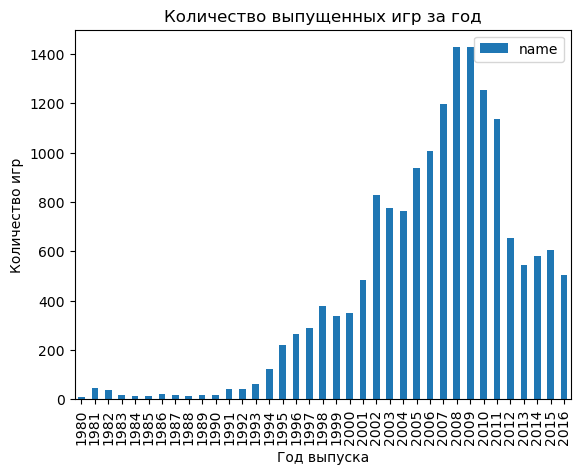

In [26]:
#выпуск игр в разные годы
df.loc[:, ['name', 'year_of_release']].groupby('year_of_release').count().plot(kind='bar', xlabel='Год выпуска', ylabel='Количество игр', title='Количество выпущенных игр за год')

Самое большое количество релизов было в 2007-2010 годах. Активно выпускаться новые игры начинают ~1995г, с 2002 по 2011 тенденция роста сохранилась, но с дополнительным равномерным подъёмом - это может быть связано с появлением новых платформ, либо массовым выпуском обновлённых версий (возможно под новые технологии). В 2012 произощшел спад практически до уровня 2001 года. Далее идёт плавное снижение.

<AxesSubplot:title={'center':'Количество выпущенных игр по платформам'}, xlabel='Платформа', ylabel='Количество игр'>

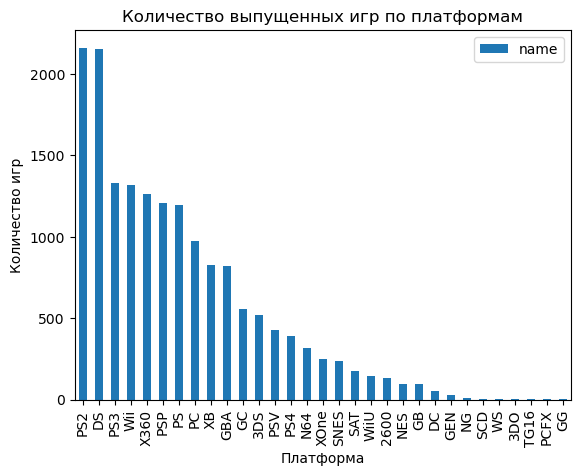

In [27]:
#Количество игр по платформам
df.loc[:, ['name', 'platform']].groupby('platform').count().sort_values('name', ascending=False).plot(kind='bar', stacked=True, xlabel='Платформа', ylabel='Количество игр', title='Количество выпущенных игр по платформам')

<AxesSubplot:title={'center':'Распределение продаж по платформам'}, xlabel='Платформа', ylabel='Количество проданных копий'>

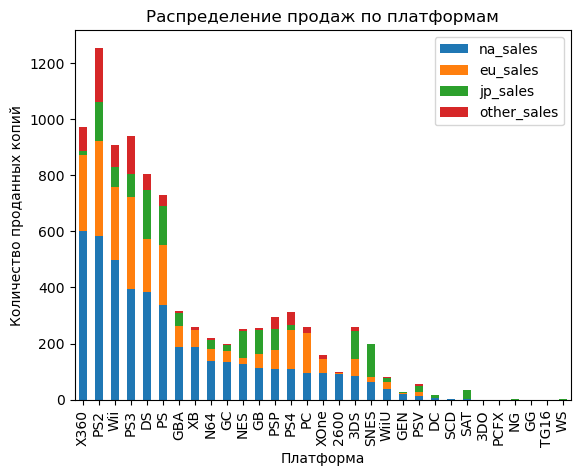

In [28]:
#продажи по платформам
df.loc[:, ['platform', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']].groupby('platform').sum().sort_values('na_sales', ascending=False).plot(kind='bar', stacked=True, xlabel='Платформа', ylabel='Количество проданных копий', title='Распределение продаж по платформам')

Распределение количества игр и продаж по платформам имеют разный профиль. Из этого сделаем вывод, что не все платформы одинаково прибыльны. На втором графике также видно, что не все платформы одинаково популярны в разных регионах. Самый большой объём рынка в Северной Америке. 

<AxesSubplot:title={'center':'Распределение продаж по платформам в зависимости от года выпуска'}, xlabel='Год выпуска', ylabel='Платформа'>

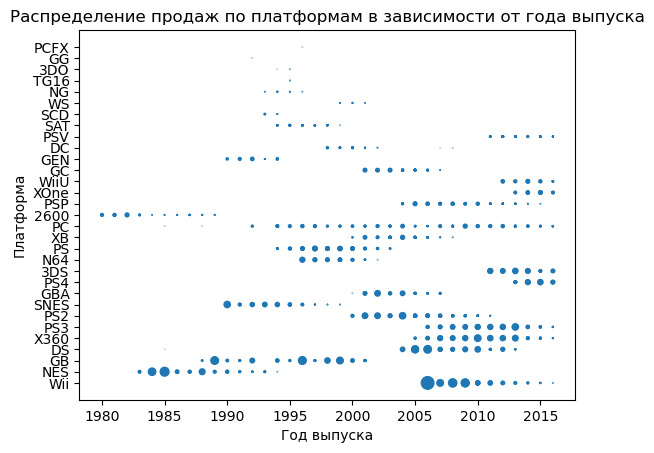

In [29]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
df.plot(kind='scatter', y='platform', x='year_of_release', s='total_sales', xlabel='Год выпуска', ylabel='Платформа', title='Распределение продаж по платформам в зависимости от года выпуска')

На графике видно, что средний срок жизни платформы от 5 до 10 лет. Для прогноза продаж имеют значения только предположительно актуальные на 2017 год платформы. 

In [30]:
#срок жизни платформы, медиана
df_platform_life = df.pivot_table(columns='platform', index='year_of_release', values='total_sales', aggfunc='sum')
platform_life = abs(df_platform_life.isna().sum() - len(df_platform_life)).sort_values(ascending=False).reset_index()
platform_life = platform_life.loc[platform_life[0] > 2] #фильтр по платформам со сроком жизни до 3-х лет

In [31]:
print('Средний срок жизни платформы', platform_life[0].median(), 'лет.')

Средний срок жизни платформы 8.5 лет.


Для расчета среднего срока жизни отброшены платформы, на которых выходили игры менее 3-х лет - таким образом исключены  все новые консоли с малыми продажами, а также неудачные консоли, которые прожили пару лет.

В целях исследования оставим только актуальные данные - за последние 2 полных года: 2014-2015-ые и неполный 2016-ый.

In [32]:
#в целях исследования оставим только актуальные данные - за последние 3 года.
df = df.loc[df['year_of_release'] >= 2014]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             1689 non-null   object  
 1   platform         1689 non-null   object  
 2   year_of_release  1689 non-null   Int32   
 3   genre            1689 non-null   object  
 4   na_sales         1689 non-null   float64 
 5   eu_sales         1689 non-null   float64 
 6   jp_sales         1689 non-null   float64 
 7   other_sales      1689 non-null   float64 
 8   critic_score     718 non-null    float64 
 9   user_score       981 non-null    float64 
 10  rating           1689 non-null   category
 11  total_sales      1689 non-null   float64 
dtypes: Int32(1), category(1), float64(7), object(3)
memory usage: 155.4+ KB


Для составления прогноза на 2017 год принято решение считать актуальными платформы, на которых были продажи в 2016г.

In [33]:
platforms = df.loc[df['year_of_release'] == 2016, 'platform'].unique().tolist()
platforms

['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii']

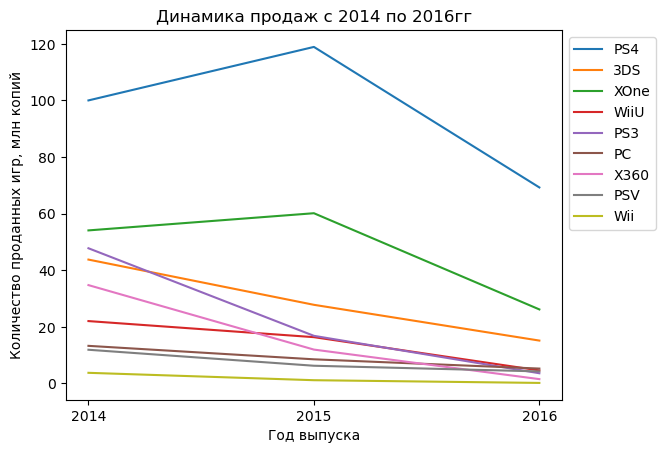

In [34]:
#динамика продаж на актуальных на 2016 год платформах за последние 3 года
df_last = df_platform_life.loc[:, platforms].tail(3)
for i in df_last.columns:
    df_last[i].plot(xlabel='Год выпуска', xticks=[2014,2015,2016], ylabel='Количество проданных игр, млн копий', title='Динамика продаж с 2014 по 2016гг')
plt.legend(bbox_to_anchor=(1,1))


До 2016 активный рост по количеству продаж демонстрируют новые платформы PS4 и XOne - сменяющие предыдущие поколения: PS3 и X360. С появлением WiiU падает популятность Wii, однако, WiiU демонстрирует спад уже в 2015г. Консоли PS3, X360 и Wii сняты с производства в 2016-2017гг - на момент 2016 года это можно было предположить исходя из факта выхода новых поколений.

Достаточно стабильно на низком уровне продаж PSV, PC. Ниспадающую динамику показывают 3DS, X360, PS3.  Спад по всем платформам в 2016г. относительно 2015-ого может быть обусловлен неполными данными за 2016г.

Потенциально прибыльные платформы:
* перспективные - PS4 и XOne;
* cтабильные на низком уровне - PSV, PC;   
* на спаде, но продажи ещё на среднем уровне - 3DS и WiiU.


In [35]:
#список потенциально прибыльных платформ: potentially profitable list
ppl = ['PS4', 'XOne', 'WiiU', 'PSV', 'PC', '3DS']
df_ppl = df.loc[df['platform'].isin(ppl)] #данные по выбранным платформам

In [36]:
df_ppl

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NA,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NA,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NA,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16699,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NA,0.01
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NA,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NA,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NA,0.01


,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PS4,376.0,0.77,1.61,0.01,0.06,0.18,0.69,14.63
3DS,212.0,0.41,1.19,0.01,0.03,0.09,0.25,11.68
XOne,228.0,0.62,1.05,0.01,0.05,0.20,0.63,7.39
WiiU,73.0,0.59,1.16,0.01,0.05,0.19,0.57,7.09
PC,151.0,0.18,0.33,0.01,0.02,0.06,0.20,3.05
PSV,295.0,0.08,0.14,0.01,0.02,0.04,0.09,1.96


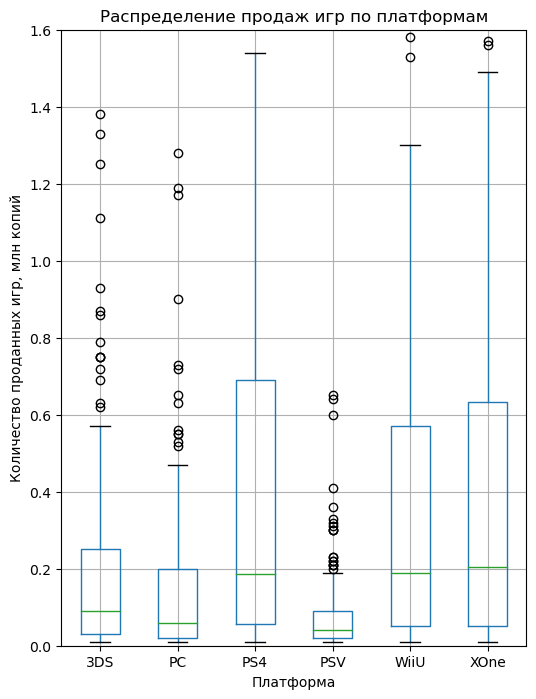

In [37]:
#глобальные продажи по выбранным платформам
ax = df_ppl.pivot_table(index='name', columns='platform', values='total_sales').boxplot(figsize=(6, 8))
ax.set_title('Распределение продаж игр по платформам')
ax.set_xlabel('Платформа')
ax.set_ylabel('Количество проданных игр, млн копий')
plt.ylim(0, 1.6) #обрезка выбросов - увеличение масштаба графика 
df_ppl.groupby('platform')['total_sales'].describe().round(2).sort_values('max', ascending=False)


На всех платформах разброс данных в сторону увеличения от медианы значительно выше, чем в строну уменьшения. Также на каждой платформе есть выбросы в большую сторону. Из этого можно заключить, что на каждой платформе есть небольшое количество игр-лидеров продаж, а основная масса на низком уровне. Наиболее ярко это выражено на PS4, XOne, WiiU и 3DS, в меньшей - на PC и PSV.

Основная масса игр на платформах PS4, XOne, WiiU имеет продажи в диапазоне 0,5 до 0,6 млн копий; ~0,19 млн в среднем.

Большинство игр на платформах 3DS и PC имеет продажи в диапазоне 0,02 до 0,25 млн копий; 0.09 и 0.06 млн в среднем соответственно.

Меньше всего продаж на PSV: большинство игр покупают от 0.02 до 0.09 млн раз; средние продажи - 0.04 млн копий.


In [38]:
#влияние отзывoв на продажи для самой популярной платформы
df_ppl.loc[:, ['platform', 'total_sales']].groupby('platform').sum().sort_values('total_sales').tail(1)

,total_sales
platform,
PS4,288.15


Самая популярная платформа: PS4

<AxesSubplot:title={'center':'Распределение продаж в зависимости от оценики критиков. PS4'}, xlabel='Общие продажи, млн копий', ylabel='Оценка критиков'>

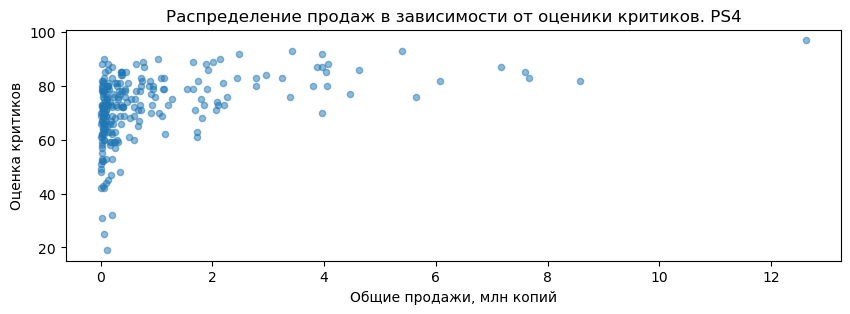

In [39]:
#влияние рейтинга критиков на количество продаж
df_ppl_ps4 = df_ppl.loc[df['platform'] == 'PS4']
df_ppl_ps4.plot(kind='scatter', x='total_sales', y='critic_score', figsize=(10, 3), alpha=0.5, xlabel='Общие продажи, млн копий', ylabel='Оценка критиков', title='Распределение продаж в зависимости от оценики критиков. PS4')

In [40]:
print('Корреляция между продажами и оценкой критиков для платформы PS4:',)
df_ppl_ps4['total_sales'].corr(df_ppl_ps4['critic_score']).round(3)

Корреляция между продажами и оценкой критиков для платформы PS4:


0.403

In [41]:
#влияние отзывoв пользователей на количество продаж
df_ppl_user_score = df_ppl.loc[df_ppl['user_score'] != 0.01] #исключаем "tbd"

<AxesSubplot:title={'center':'Распределение продаж в зависимости от оценики пользователей. PS4'}, xlabel='Общие продажи, млн копий', ylabel='Оценка пользователей'>

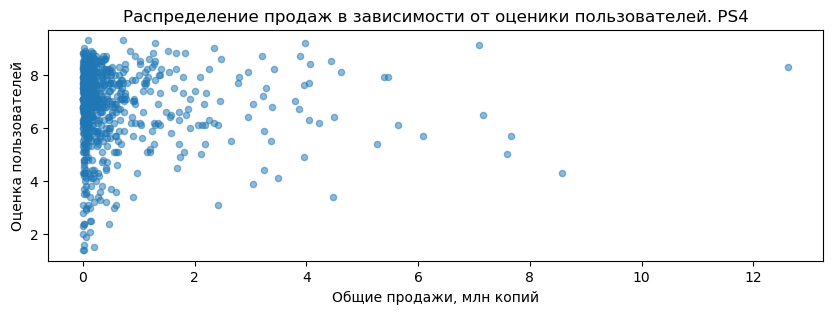

In [42]:
df_ppl_user_score_ps4 = df_ppl_user_score.loc[df['platform'] == 'PS4']
df_ppl_user_score.plot(kind='scatter', x='total_sales', y='user_score', figsize=(10, 3), alpha=0.5, xlabel='Общие продажи, млн копий', ylabel='Оценка пользователей', title='Распределение продаж в зависимости от оценики пользователей. PS4')

In [43]:
print('Корреляция между продажами и оценкой пользователей для платформы PS4:',)
print(df_ppl_user_score_ps4['total_sales'].corr(df_ppl_user_score_ps4['user_score']).round(3))

Корреляция между продажами и оценкой пользователей для платформы PS4:
-0.04


Корреляция между продажами и оценкой критиков для платформы:
XOne :  0.429
WiiU :  0.37
PSV :  0.043
PC :  0.175
3DS :  0.314


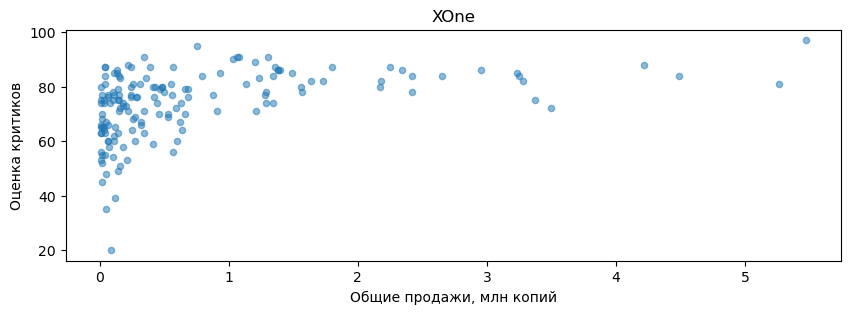

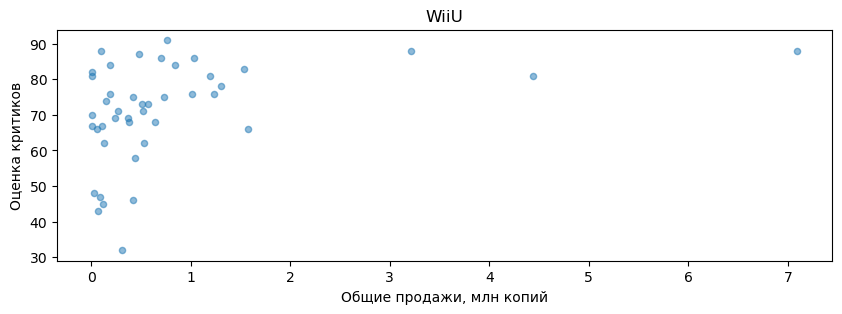

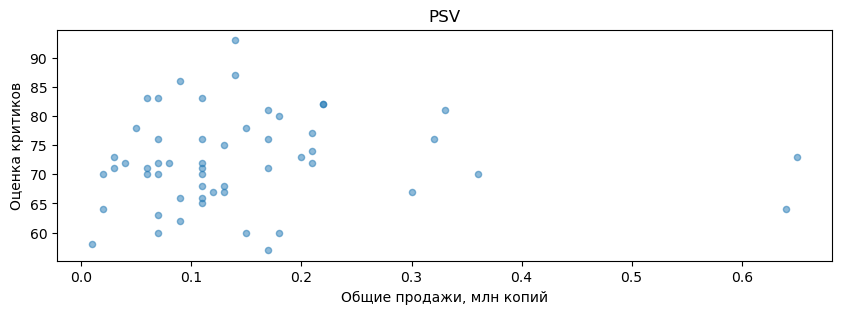

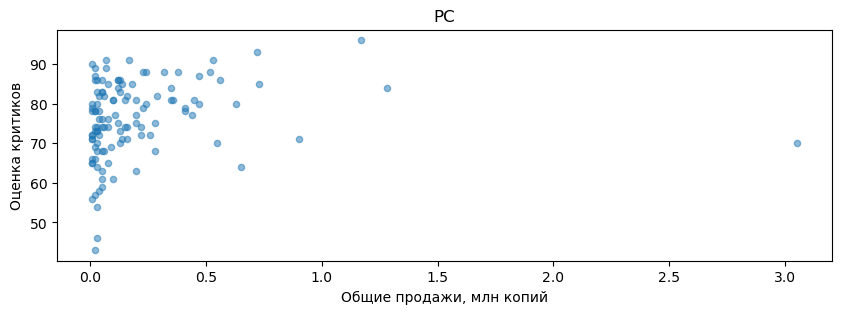

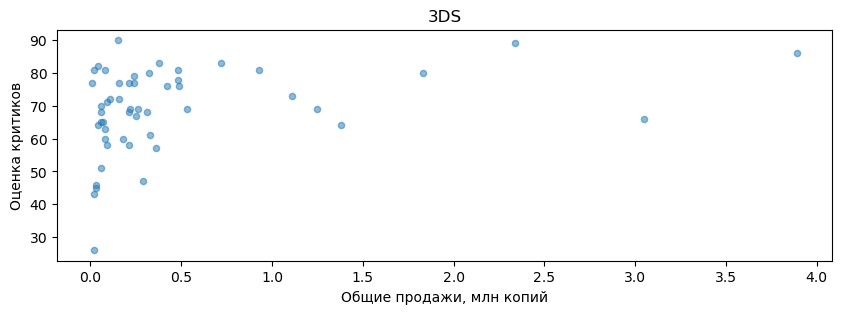

In [44]:
#влияние отзывов критиков на продажи для остальных платформ
print('Корреляция между продажами и оценкой критиков для платформы:',)
for i in ppl[1:]:
    df_ppl.loc[df_ppl['platform'] == i].plot(kind='scatter', x='total_sales', y='critic_score', title=i, figsize=(10, 3), alpha=0.5,\
                                            xlabel='Общие продажи, млн копий', ylabel='Оценка критиков')
    print( i, ': ', df_ppl.loc[df_ppl['platform']==i, 'total_sales'].corr(df_ppl.loc[df_ppl['platform']==i, 'critic_score']).round(3))
  

Корреляция между продажами и оценкой пользователей для платформы:
XOne :  -0.07
WiiU :  0.408
PSV :  -0.168
PC :  -0.072
3DS :  0.215


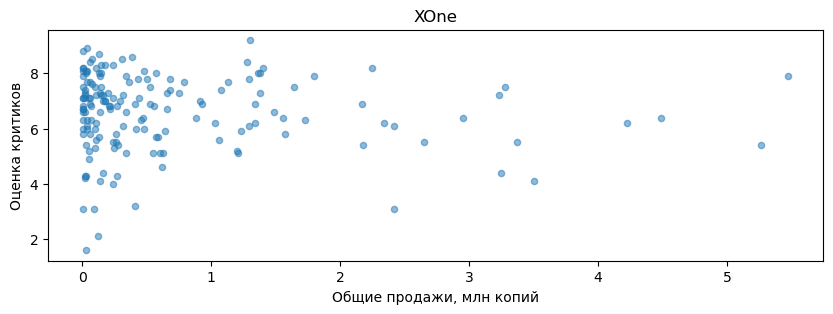

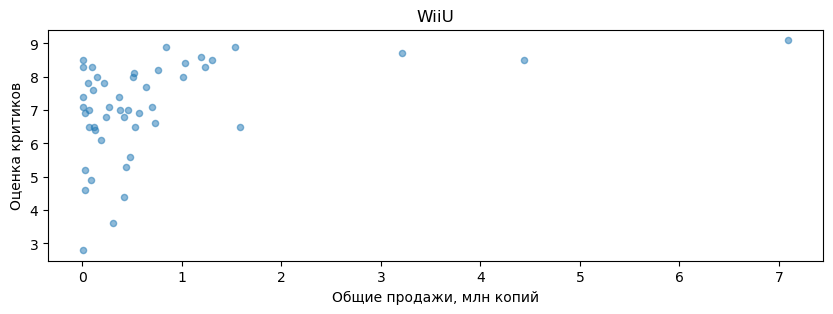

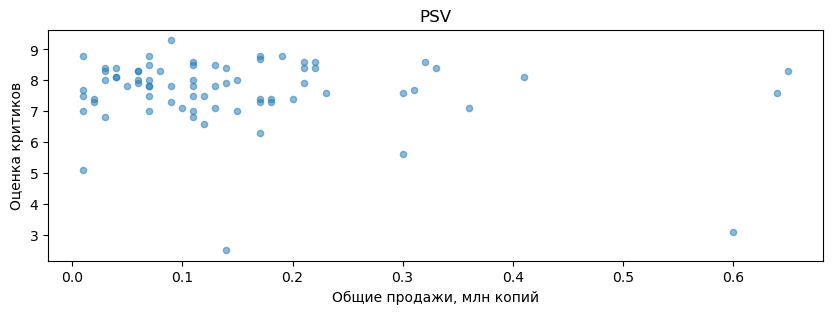

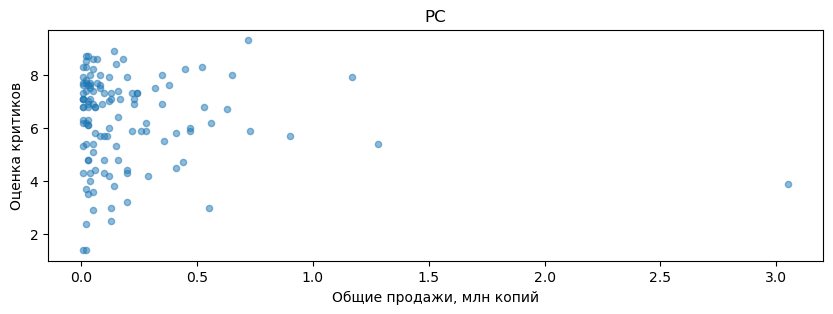

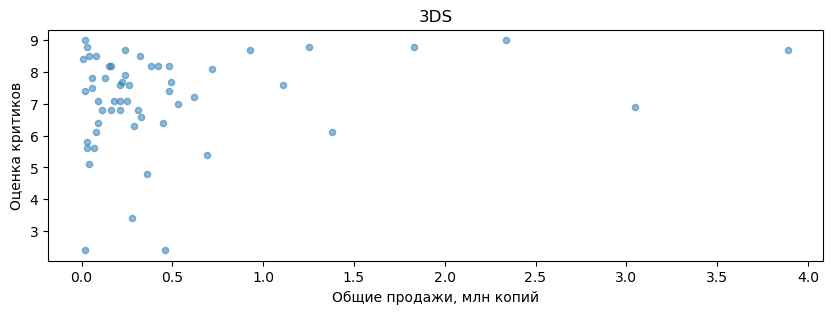

In [45]:
#влияние рейтинга пользователей на продажи для остальных платформ
print('Корреляция между продажами и оценкой пользователей для платформы:',)
for i in ppl[1:]:
    df_ppl_user_score.loc[df_ppl_user_score['platform'] == i].plot(kind='scatter', x='total_sales', y='user_score', title=i, figsize=(10, 3), alpha=0.5,\
                                                                  xlabel='Общие продажи, млн копий', ylabel='Оценка критиков')
    print( i, ': ', df_ppl_user_score.loc[df_ppl_user_score['platform']==i, 'total_sales'].corr(df_ppl_user_score.loc[df_ppl_user_score['platform']==i, 'user_score']).round(3))

Для платформы PS4 низкое количество продаж имеют игры с любой оценкой критиков, однако среди наиболее популярных игр диапазон оценок начинается от 60 и выше. Коэффициент корреляции положительный, но менее 0,5 - зависимость выражена неярко.

Для платформы PS4 низкое количество продаж также имеют игры с любой оценкой пользователей, но разброс по оценкам среди наиболее популярных игр шире - визуально от 3 и выше. Коэффициент корреляции отрицательный - зависимость по коэффициенту Пирсона не найдена.

Для отстальных платформ зависимость продаж от оценок критиков выражена в большей или меньшей степени. Зависимости от оценки пользователей найдены не у всех платформ. Значения коэффициента Пирсона следующие:

Корреляция между продажами и оценкой критиков для платформы:
* XOne :  0.429
* WiiU :  0.37
* PSV :  0.043
* PC :  0.175
* 3DS :  0.314

Корреляция между продажами и оценкой пользователей для платформы:
* XOne :  -0.07
* WiiU :  0.408
* PSV :  -0.168
* PC :  -0.072
* 3DS :  0.215

<AxesSubplot:title={'center':'Количество проданных игр по жанрам'}, xlabel='Жанр', ylabel='Количество проданных игр, млн копий'>

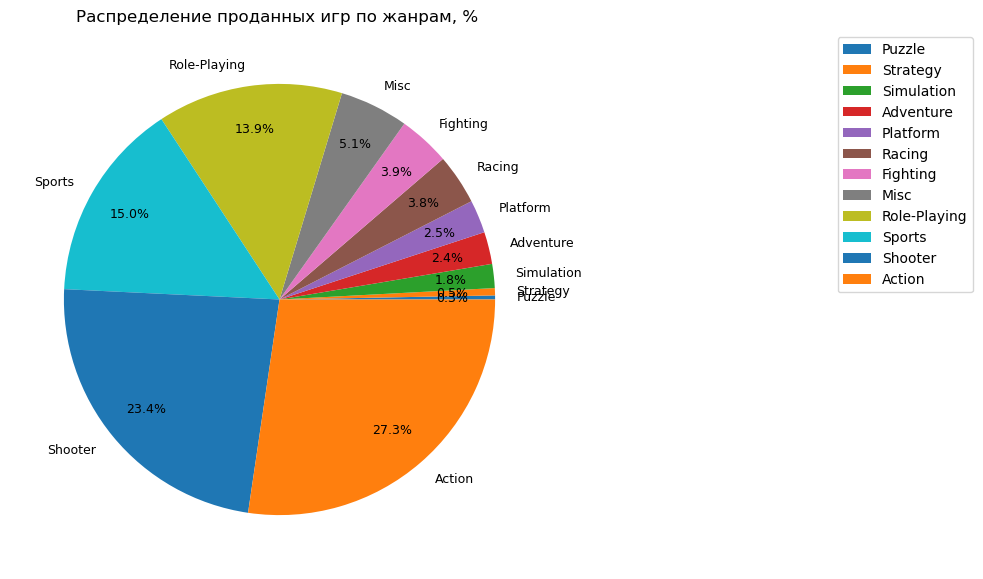

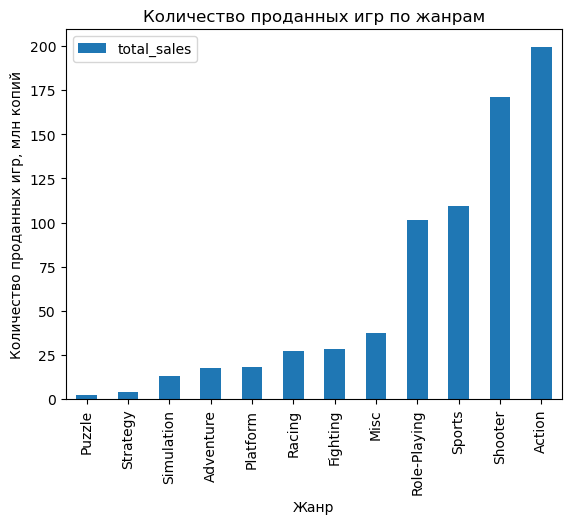

In [46]:
#распределение по жанрам: в % и суммарно
df_genre_grouped = df.loc[:,['genre', 'total_sales']].groupby('genre').sum().sort_values('total_sales')

df_genre_grouped.plot(kind='pie', figsize=(7, 7), y='total_sales', ylabel='', autopct='%1.1f%%', pctdistance=0.8, radius=1, textprops={'fontsize': 9}, title='Распределение проданных игр по жанрам, % ') 
plt.legend(bbox_to_anchor=(1.8,1))
df_genre_grouped.plot(kind='bar', y='total_sales', xlabel='Жанр',  ylabel='Количество проданных игр, млн копий', title='Количество проданных игр по жанрам')


In [47]:
#суммарные и средние значения
df.pivot_table(index='genre', values='total_sales', aggfunc=['count', 'sum', 'median']).round(2).reset_index()\
.sort_values(by=('median', 'total_sales'), ascending=False)


,genre,count,sum,median
,,total_sales,total_sales,total_sales
8,Shooter,128,170.94,0.52
10,Sports,161,109.48,0.18
4,Platform,38,18.09,0.14
2,Fighting,60,28.22,0.12
7,Role-Playing,221,101.44,0.11
9,Simulation,44,13.13,0.10
0,Action,619,199.36,0.09
3,Misc,113,37.55,0.09
6,Racing,69,27.52,0.09


Самые популярные игры жанра Action - 27,3% продаж (199,36 млн копий). Далее жанр Shooter - 23,4% (170,94 млн). 15% (109,48 млн) и 13.9% (101,44 млн) - Sports и Role-Playing соответственно. Ниже 5% - остальные.

Самые прибыльные игры жанра Shooter - медианное значение количества продаж составляет 0,52 млн копий. Ниже, с большим отрывом, в диапазоне медианы продаж одной игры от 0.18 до 0.1 млн Sports, Platform, Fighting, Role-Playing и Simulation. В наиболее популярном жанре - Action - продаётся в среднем 0,09 млн копий, на этом же уровне Misc и Racing. Ниже оставшиеся жанры.


,genre,count,sum,median
,,total_sales,total_sales,total_sales
8,Shooter,99,145.11,0.55
10,Sports,104,77.96,0.20
4,Platform,33,17.14,0.15
2,Fighting,38,24.67,0.12
7,Role-Playing,187,92.05,0.11
9,Simulation,40,12.33,0.10
3,Misc,89,26.43,0.09
6,Racing,53,24.88,0.09
0,Action,495,167.54,0.08


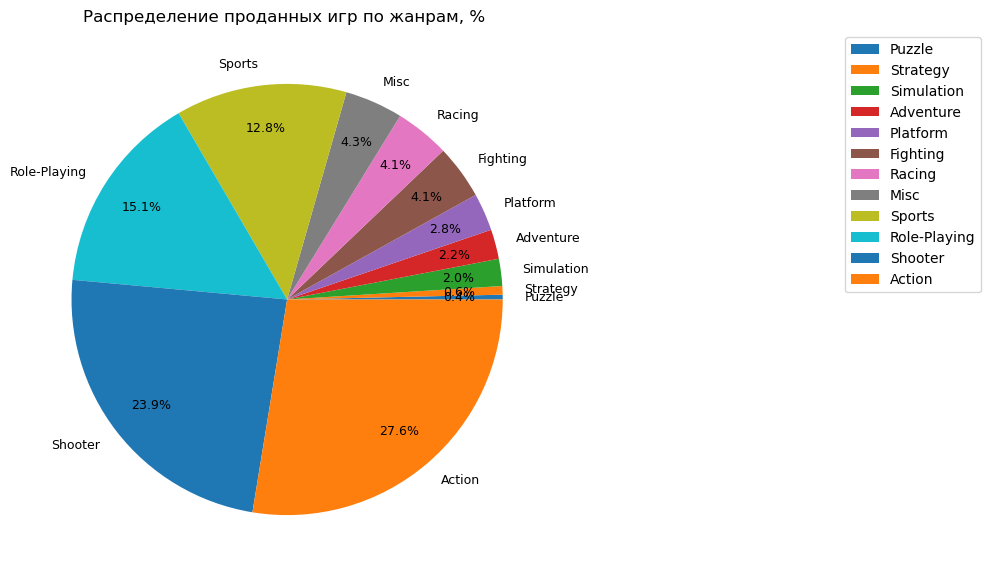

In [48]:
#для выбранных платформ
df_ppl_genre_grouped = df_ppl.loc[:,['genre', 'total_sales']].groupby('genre').sum().sort_values('total_sales')
df_ppl_genre_grouped.plot(kind='pie', figsize=(7, 7), y='total_sales', ylabel='', autopct='%1.1f%%', pctdistance=0.8, radius=1, textprops={'fontsize': 9}, title='Распределение проданных игр по жанрам, % ') 
plt.legend(bbox_to_anchor=(1.8,1))
df_ppl.pivot_table(index='genre', values='total_sales', aggfunc=['count', 'sum', 'median']).round(2).reset_index()\
.sort_values(by=('median', 'total_sales'), ascending=False)


По выбранным платформам распределение следующее:

* Самые популярные игры жанра Action - 27,6% продаж (167,54 млн копий). Далее жанр Shooter - 23,9% (145,11 млн). 15,1% (92,05 млн) и 12,8% (77,96 млн) - Role-Playing и Sports соответственно. Ниже 5% - остальные.

* Самые прибыльные игры жанра Shooter - медианное значение количества продаж составляет 0,55 млн копий. Далее, с большим отрывом, в диапазоне 0.2 до 0.1 млн копий игры продаётся в жанрах Sports, Platform, Fighting, Role-Playing и Simulation. В наиболее популярном жанре - Action - продаётся в среднем 0,08 млн копий, 0.09 млн - Misc и Racing. Ниже оставшиеся жанры.


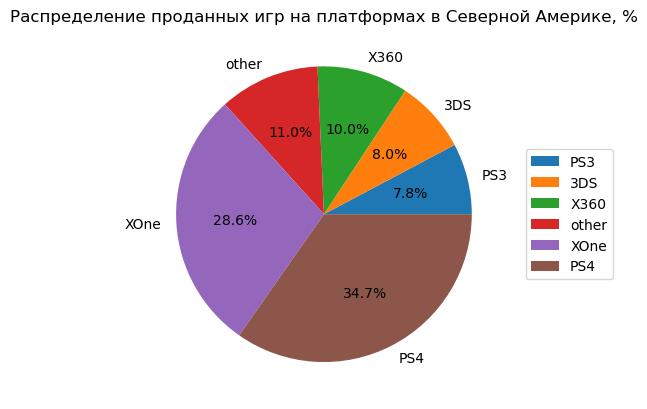

In [49]:
#портрет пользователя региона. популярные платформы
pl_na = df.loc[:, ['platform', 'na_sales']].pivot_table(index='platform', values='na_sales', aggfunc='sum').\
sort_values('na_sales', ascending=False).reset_index()
pl_na.loc[5:,'platform'] = 'other'
pl_na = pl_na.groupby('platform').sum().sort_values('na_sales')
pl_na.plot(kind='pie', y='na_sales', ylabel='', autopct='%1.1f%%', title='Распределение проданных игр на платформах в Северной Америке, %')
plt.legend(loc = 'right', bbox_to_anchor=(1.3, 0.5))

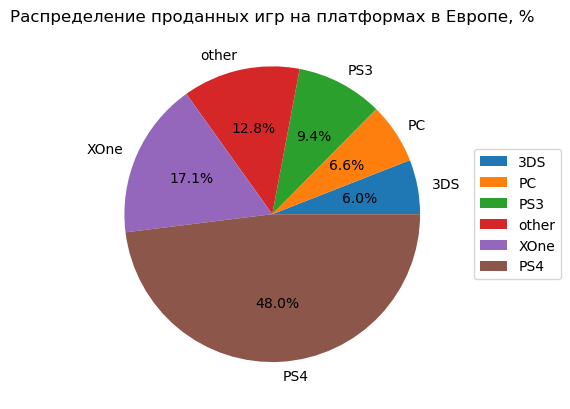

In [50]:
pl_eu = df.loc[:, ['platform', 'eu_sales']].pivot_table(index='platform', values='eu_sales', aggfunc='sum').\
sort_values('eu_sales', ascending=False).reset_index()
pl_eu.loc[5:,'platform'] = 'other'
pl_eu = pl_eu.groupby('platform').sum().sort_values('eu_sales')
pl_eu.plot(kind='pie', y='eu_sales', ylabel='', autopct='%1.1f%%', title='Распределение проданных игр на платформах в Европе, %')
plt.legend(loc = 'right', bbox_to_anchor=(1.3, 0.5))

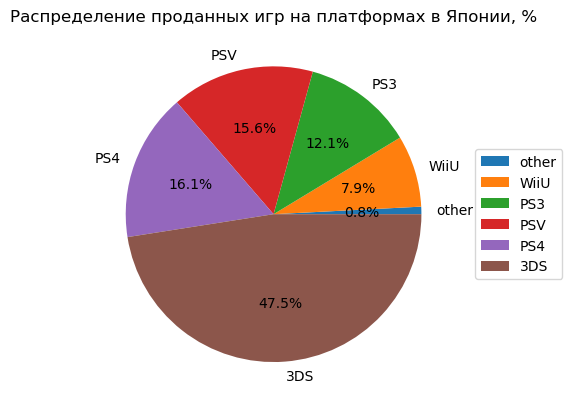

In [51]:
pl_jp = df.loc[:, ['platform', 'jp_sales']].pivot_table(index='platform', values='jp_sales', aggfunc='sum').\
sort_values('jp_sales', ascending=False).reset_index()
pl_jp.loc[5:,'platform'] = 'other'
pl_jp = pl_jp.groupby('platform').sum().sort_values('jp_sales')
pl_jp.plot(kind='pie', y='jp_sales', ylabel='', autopct='%1.1f%%', title='Распределение проданных игр на платформах в Японии, %')
plt.legend(loc = 'right', bbox_to_anchor=(1.3, 0.5))

Топ 5 популярных платформ Северной Америки:
* PS4 - 34,7%,
* XOne - 28,6%  
* X360- 10,0%,
* 3DS - 8,0%,
* PS3 - 7,8%,
* Другие - 11,0%.


Топ 5 популярных платформ Европы:
* PS4 - 48,0%,
* XOne - 17,1%,
* PS3 - 6,4%,
* PC - 6,6%,
* 3DS - 6,0%,
* Другие - 12,8%.


Топ 5 популярных платформ Японии:
* 3DS - 47,5%,
* PS4 - 16,1%,
* PSV - 15,6%,
* PS3 - 12,1%,
* WiiU - 7,9%,
* Другие - 0,8%.


PS4, PS3, 3DS входят в топ-5 всех 3 регионов на разных позициях, PS4 - на первых. ХOne и X360 в топ-3 в С-Америке и Европе. В Японии на первом месте с большим отрывом 3DS. На 3-й позиции PSV и 5-ой WiiU, не вошедшие в топ-5 в других регионах. Доля платформ, не вошедших в топ-5 в Северной Америке и Европе значительно выше, чем в Японии: 11% и 12% к 0,8%.

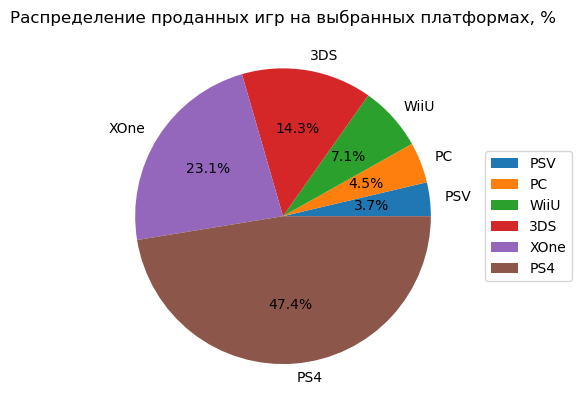

In [52]:
#анализ выбранных платформ, глобальные данные
pl_df_ppl = df_ppl.loc[:, ['platform', 'total_sales']].pivot_table(index='platform', values='total_sales', aggfunc='sum').\
sort_values('total_sales', ascending=False).sort_values('total_sales')
pl_df_ppl.plot(kind='pie', y='total_sales', ylabel='', autopct='%1.1f%%', title='Распределение проданных игр на выбранных платформах, %')
plt.legend(loc = 'right', bbox_to_anchor=(1.3, 0.5))

Наибольший процент продаж среди выбранных платформ приходится на PS4(47,4%) - занимающая первые позиции в С-Америке и Европе и 2-е в Японии. В 2 раза меньший процент составляют продажи игр для XOne(23,1%). 14,3% продаж - 3DS. Оставшиеся платфомы: WiiU, PSV, PC можно назвать региональными, т.к. первые 2 вошли в топ 5 только в Японии, последняя - только в Европе.

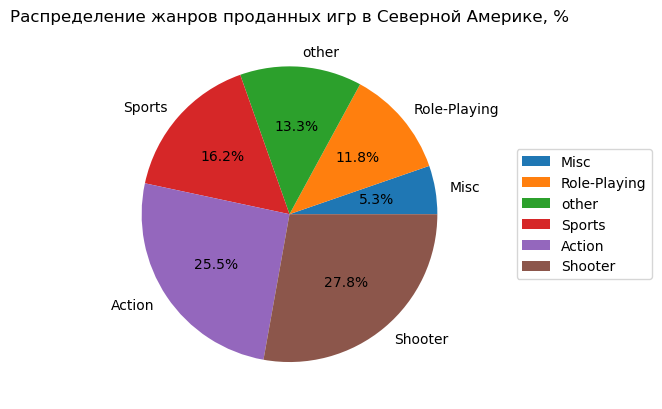

In [53]:
#портрет пользователя региона. популярные жанры
genre_na = df.loc[:, ['genre', 'na_sales']].pivot_table(index='genre', values='na_sales', aggfunc='sum').\
sort_values('na_sales', ascending=False).reset_index()
genre_na.loc[5:,'genre'] = 'other'
genre_na = genre_na.groupby('genre').sum().sort_values('na_sales')
genre_na.plot(kind='pie', y='na_sales', ylabel='', autopct='%1.1f%%', title='Распределение жанров проданных игр в Северной Америке, %')
plt.legend(loc = 'right', bbox_to_anchor=(1.5, 0.5))

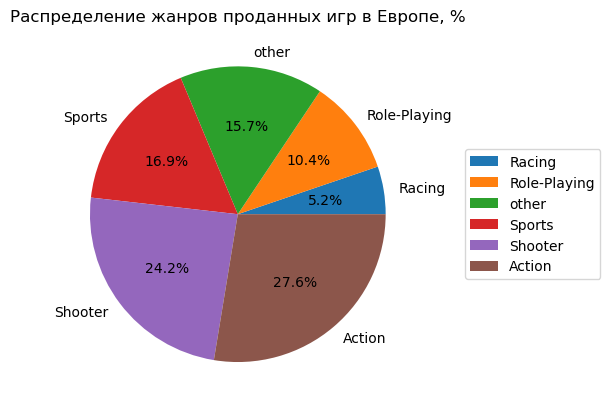

In [54]:
genre_eu = df.loc[:, ['genre', 'eu_sales']].pivot_table(index='genre', values='eu_sales', aggfunc='sum').\
sort_values('eu_sales', ascending=False).reset_index()
genre_eu.loc[5:,'genre'] = 'other'
genre_eu = genre_eu.groupby('genre').sum().sort_values('eu_sales')
genre_eu.plot(kind='pie', y='eu_sales', ylabel='', autopct='%1.1f%%', title='Распределение жанров проданных игр в Европе, %')
plt.legend(loc = 'right', bbox_to_anchor=(1.5, 0.5))

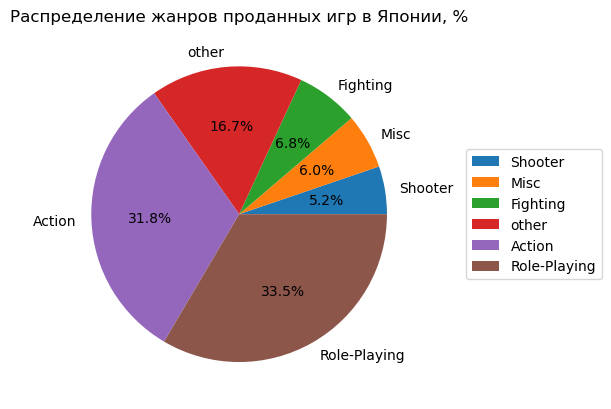

In [55]:
genre_jp = df.loc[:, ['genre', 'jp_sales']].pivot_table(index='genre', values='jp_sales', aggfunc='sum').\
sort_values('jp_sales', ascending=False).reset_index()
genre_jp.loc[5:,'genre'] = 'other'
genre_jp = genre_jp.groupby('genre').sum().sort_values('jp_sales')
genre_jp.plot(kind='pie', y='jp_sales', ylabel='', autopct='%1.1f%%', title='Распределение жанров проданных игр в Японии, %')
plt.legend(loc = 'right', bbox_to_anchor=(1.5, 0.5))


Топ 5 популярных жанров в Северной Америки:
* Shooter - 27,8%,
* Action - 25,5%,
* Sports - 16,2%,
* Role-Playing - 11,8%,
* Misc - 5,3%,
* Другие - 13,3%.

Топ 5 популярных жанров в Европе:
* Action - 27,6%,
* Shooter - 24,2%,
* Sports - 16,9%,
* Role-Playing - 10,4%,
* Racing - 5,2%,
* Другие - 15,7%.

Топ 5 популярных жанров в Японии: 
* Role Plaing - 33,5%,
* Action - 31,8%,    
* Fighting - 6,8%,
* Misc - 6,0%,
* Shooter - 4,9%,
* Другие - 16,7%.

Топ 5 рынков С-Америки и Европы практически совпадают за исключением 5-ого места: 5,2% Европейцев предпочитают Racing, 5,3% Американцев - Misc.

Рынок Японии отличается: на первом месте (33,5%) - Role-Playing. Только в топ-5 Японии присутствует Fighting(6,8%). Как и в Северной Америке и Европе, популярны игры Action. Доля других жанров суммарно во всех регионах примерно одинакова: от 13 до 17%.


,eu_sales,jp_sales,na_sales,percent_of_total_na,percent_of_total_eu,percent_of_total_jp
rating,,,,,,
AO,0.00,0.00,0.00,0.00,0.00,0.00
E,58.06,8.94,50.74,17.86,21.45,9.60
E10+,26.16,4.46,33.23,11.70,9.66,4.79
EC,0.00,0.00,0.00,0.00,0.00,0.00
K-A,0.00,0.00,0.00,0.00,0.00,0.00
M,93.44,8.01,96.42,33.94,34.52,8.60
NA,58.95,56.90,64.72,22.78,21.78,61.12
RP,0.00,0.00,0.00,0.00,0.00,0.00
T,34.07,14.78,38.95,13.71,12.59,15.88


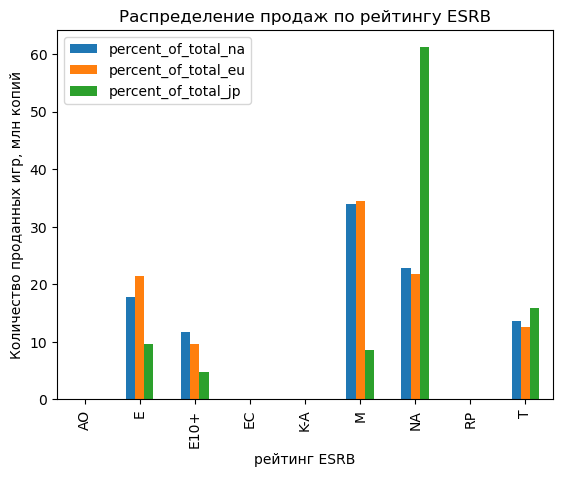

In [56]:
#влияние рейтинга ESRB в отдельных регионах
df_rating_reg = df.pivot_table(index='rating', values=['na_sales', 'jp_sales',  'eu_sales'], aggfunc='sum')
df_rating_reg['percent_of_total_na'] = (100 * df_rating_reg['na_sales'] / df_rating_reg['na_sales'].sum()).round(2)
df_rating_reg['percent_of_total_eu'] = (100 * df_rating_reg['eu_sales'] / df_rating_reg['eu_sales'].sum()).round(2)
df_rating_reg['percent_of_total_jp'] = (100 * df_rating_reg['jp_sales'] / df_rating_reg['jp_sales'].sum()).round(2)
df_rating_reg.loc[:, ['percent_of_total_na', 'percent_of_total_eu', 'percent_of_total_jp']].plot(kind='bar', xlabel='рейтинг ESRB', ylabel='Количество проданных игр, млн копий', title='Распределение продаж по рейтингу ESRB')
df_rating_reg

В Северной Америке и Европе влияние возрастного рейтинга на продажи не так ярко выражено, как в Японии, где в 2 раза выше % продаж у игр без рейтинга ESRB. Ассоциация ESRB создана в США и Канаде, возможно игры, направленные на японский рынок реже рецензируются ассоциацией. Также ассоциацией не рецензируются игры, содержание которых зависит от игроков. Таким условиям соответствуют игры Role-Playing, наиболее популятные в Японии.

Отметичено, что рейтинг К-А - это более раннее обозначение рейтинга E(Everyone), однако, доля игр рейтинга К-А менее 0,01% за исследуемый период - по всей видимости, это игры выпуска конца 90-х.

Таким образом, процентные соотношения следующие:
* 22-23% в С-Америке и Европе и 61% в Японии - продажи игр без рейтинга ESRB;
* 18% и 21% в С-Америке и Европе и 10% в Японии - рейтинг E;
* 13-14% в С-Америке и Европе и 16% в Японии - рейтинг T;
* 35-34% в С-Америке и Европе и 9% в Японии - рейтинг M;
* 10-12% в С-Америке и Европе и 5% в Японии - рейтинг E10+;
* менее 0,05% продаж с рейтингом AO, EC, K-A, RP по каждому из регионов.>


,eu_sales,jp_sales,na_sales,percent_of_total_na,percent_of_total_eu,percent_of_total_jp
rating,,,,,,
AO,0.00,0.00,0.00,0.00,0.00,0.00
E,45.90,8.29,37.65,16.25,20.21,10.18
E10+,17.89,4.32,23.53,10.16,7.88,5.31
EC,0.00,0.00,0.00,0.00,0.00,0.00
K-A,0.00,0.00,0.00,0.00,0.00,0.00
M,82.38,6.40,82.23,35.50,36.28,7.86
NA,50.80,50.43,55.76,24.07,22.37,61.93
RP,0.00,0.00,0.00,0.00,0.00,0.00
T,30.09,11.99,32.46,14.01,13.25,14.72


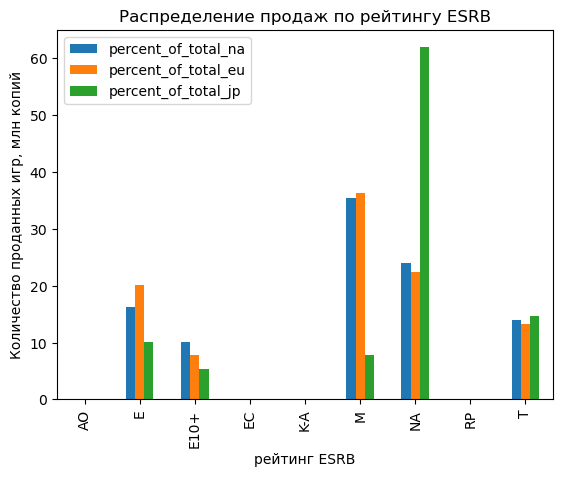

In [57]:
#анализ выбранных платформ, глобальные данные
df_ppl_rating_reg = df_ppl.pivot_table(index='rating', values=['na_sales', 'jp_sales',  'eu_sales'], aggfunc='sum')
df_ppl_rating_reg['percent_of_total_na'] = (100 * df_ppl_rating_reg['na_sales'] / df_ppl_rating_reg['na_sales'].sum()).round(2)
df_ppl_rating_reg['percent_of_total_eu'] = (100 * df_ppl_rating_reg['eu_sales'] / df_ppl_rating_reg['eu_sales'].sum()).round(2)
df_ppl_rating_reg['percent_of_total_jp'] = (100 * df_ppl_rating_reg['jp_sales'] / df_ppl_rating_reg['jp_sales'].sum()).round(2)
df_ppl_rating_reg.loc[:, ['percent_of_total_na', 'percent_of_total_eu', 'percent_of_total_jp']].plot(kind='bar', xlabel='рейтинг ESRB', ylabel='Количество проданных игр, млн копий', title='Распределение продаж по рейтингу ESRB')
df_ppl_rating_reg

Процентное соотношение продаж среди игр с популярными рейтингами на выбранных платформах визуально повторяет график с общими данными. Цифровые параметры расходятся в пределах 3 п.п.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Формулировка гипотез**

H0 - Средние пользовательские рейтинги платформ Xbox One и PC равны.

H1 - Средние пользовательские рейтинги платформ Xbox One и PC отличаются.

Уровень значимости - 0,01, т.к. размер выборок в диапазоне от 150 до 300. 

In [58]:
#проверка методом Стьюдента для средних 2-х совокупностей
sample1 = df.loc[df['platform'] == 'XOne', 'user_score'].dropna().to_list() #средний рейтинг XOne
sample2 = df.loc[df['platform'] == 'PC', 'user_score'].dropna().to_list() #средний рейтинг PC
results = st.ttest_ind(sample1, sample2, equal_var=False)
print('p-значение:', results.pvalue.round(3))
alpha = 0.1 #уровень значисмости
print()
if results.pvalue > alpha:
    print ('Гипотеза Н0 не опровергнута. Средние пользовательские рейтинги платформ Xbox One и PC совпадают.')
else:
    print ('Верна альтернативная гипотеза Н1 - средние пользовательские рейтинги платформ Xbox One и PC отличаются.')

p-значение: 0.585

Гипотеза Н0 не опровергнута. Средние пользовательские рейтинги платформ Xbox One и PC совпадают.


In [59]:
#расчет по выборкам
print('Средний рейтинг Xbox One:', df.loc[df['platform'] == 'XOne', 'user_score'].mean())
print('Средний рейтинг PC:', df.loc[df['platform'] == 'PC', 'user_score'].mean())

Средний рейтинг Xbox One: 6.1830113636363615
Средний рейтинг PC: 6.050787401574801


Расчет совпадает с выводом проверки гипотезы: значения отличаются менее чем на 1%.

### Cредние пользовательские рейтинги жанров Action и Sports - разные.

**Формулировка гипотез**
H0 - Средние пользовательские рейтинги жанров Action и Sports совпадают.

H1 - Средние пользовательские рейтинги жанров Action и Sports разные.

Уровень значимости - 0,01, т.к. размер выборок в диапазоне от 160 до 620.

In [60]:
#проверка методом Стьюдента для средних 2-х совокупностей
sample1 = df.loc[df['genre'] == 'Action', 'user_score'].dropna().to_list() #средний рейтинг в жанре Action
sample2 = df.loc[df['genre'] == 'Sports', 'user_score'].dropna().to_list() #средний рейтинг в жанре Sports
results = st.ttest_ind(sample1, sample2, equal_var=False)
print('p-значение:', results.pvalue.round(3))
alpha = 0.5 #уровень значисмости
print()
if results.pvalue > alpha:
    print ('Гипотеза Н0 не опровергнута. Средние пользовательские рейтинги жанров Action и Sports совпадают.')
else:
    print ('Верна альтернативная гипотеза Н1 - средние пользовательские рейтинги жанров Action и Sports разные.')

p-значение: 0.0

Верна альтернативная гипотеза Н1 - средние пользовательские рейтинги жанров Action и Sports разные.


In [61]:
#расчет по выборкам
print('Средний рейтинг игр Action:', df.loc[df['genre'] == 'Action', 'user_score'].mean())
print('Средний рейтинг игр Sports:', df.loc[df['genre'] == 'Sports', 'user_score'].mean())

Средний рейтинг игр Action: 5.959347181008895
Средний рейтинг игр Sports: 4.844525547445252


Расчет совпадает с выводом проверки гипотезы: значения отличаются более чем на 20%.

## Выводы

### Предварительная обработка данных

Для проведения исследования были предоставлены данные о количестве проданных копий 16715 игр, вышедших в период с 1980 по 2016 г.

Данные о названии, годе выпуска, жанре, рейтинге критиков, рейтиннге пользователей и рейтинге организации содержат пропуски. Вероятные причины:
* пропуск названия - сбой при выгрузке данных в файл csv, возможно название содержит нестандартные символы. Данные удалены.
* пропуск жанра - жанр не указан размещающим игру.
* пропуск года выпуска - год неизвестен. Это возможно в случае игры, которая ещё не вышла - маловероятно в данном случае. Официальные даты выпуска могут отличаться в разных странах - возможно в этом случае возникла ошибка заполнения. Также возможно, что год не проставлен человеком, составлявшим описание. Необходимо уточнить, как заполняются данные.</li>
* пропуск оценки критиков - данные об оценке отсутствуют по какой-либо причине. Необходимо уточнить, как заполняются данные.
* пропуск оценка пользователей - данные об оценке отсутствуют по какой-то причине.  Необходимо уточнить, как заполняются данные.
* пропуск рейтинга ассоциации ESRB - пропуски из-за отсутствия данных о конкретной игре, игра не проходила оценку в асоциации.

Произведены замены данных:
* пользовательский рейтинг "tbd" заменён на численное значение 0.01;
* отсутствие рейтинга ESRB заменено на "NA".
 
Полных дубликатов строк не обнаружено. Выявлена 1 строка с продублированной игрой, удалена.

Проверка названий игр на неявные дубликаты нецелесообразна, т.к. возможные дубликаты отдельных игр не искажают агрегированных значений по количеству продаж и рейтингов.


### Исследовательский анализ данных
**Исследование платформ за весь период предоставленных данных.**

Распределение количества игр и продаж по платформам имеют разный профиль. Из этого сделаем вывод, что не все платформы одинаково прибыльны. На втором графике также видно, что не все платформы одинаково популярны в разных регионах. Самый большой объём рынка в Северной Америке.

Для целей исследования выбран актуальный период: с 2014 по 2016гг. Далее все выводы сделаны на основе этого периода.

По итогам оценки динамики продаж по платформам, выбраны следующие потенциально прибыльные платформы:
* перспективные - PS4 и XOne;
* cтабильные на низком уровне - PSV, PC;    
* на спаде, но продажи ещё на среднем уровне - 3DS и WiiU.

**Глобальные продажи по выбранным платформам.**

На каждой платформе есть небольшое количество игр-лидеров продаж, а основная масса на низком уровне. Наиболее ярко это выражено на PS4, XOne, WiiU и 3DS, в меньшей - на PC и PSV.

Основная масса игр на платформах PS4, XOne, WiiU имеет продажи в диапазоне 0,5 до 0,6 млн копий; ~0,19 млн в среднем.

Большинство игр на платформах 3DS и PC имеет продажи в диапазоне 0,02 до 0,25 млн копий; 0.09 и 0.06 млн в среднем соответственно.

Меньше всего продаж на PSV: большинство игр покупают от 0.02 до 0.09 млн раз; средние продажи - 0.04 млн копий.

**Зависимость количества продаж от оценок критиков и пользователей.**

Для самой популярной из выбранных платформ - PS4 - низкое количество продаж имеют игры с любой оценкой критиков, однако среди наиболее популярных игр диапазон оценок начинается от 60 и выше. Коэффициент корреляции положительный, но менее 0,5 - зависимость выражена неярко.

Для платформы PS4 низкое количество продаж также имеют игры с любой оценкой пользователей, но разброс по оценкам среди наиболее популярных игр шире - визуально от 3 и выше. Коэффициент корреляции отрицательный - зависимость по коэффициенту Пирсона не найдена.

Для остальных выбранных платформ зависимость продаж от оценок критиков выражена в большей или меньшей степени. Зависимости от оценки пользователей найдены не у всех платформ. Значения коэффициента Пирсона следующие:

1. Корреляция между продажами и оценкой критиков для платформы:
    * XOne :  0.429
    * WiiU :  0.37
    * PSV :  0.043
    * PC :  0.175
    * 3DS :  0.314

2. Корреляция между продажами и оценкой пользователей для платформы:
    * XOne :  -0.07
    * WiiU :  0.408
    * PSV :  -0.168
    * PC :  -0.072
    * 3DS :  0.215

**Распределение игр по жанрам. Прибыльность.**

Самые популярные игры жанра Action - 27,3% продаж (199,36 млн копий). Далее жанр Shooter - 23,4% (170,94 млн). 15% (109,48 млн) и 13.9% (101,44 млн) - Sports и Role-Playing соответственно. Ниже 5% - остальные.

Самые прибыльные игры жанра Shooter - медианное значение количества продаж составляет 0,52 млн копий. Ниже, с большим отрывом, в диапазоне медианы продаж одной игры от 0.18 до 0.1 млн Sports, Platform, Fighting, Role-Playing и Simulation. В наиболее популярном жанре - Action - продаётся в среднем 0,09 млн копий, на этом же уровне Misc и Racing. Ниже оставшиеся жанры.

Данное распределение в процентном отношении совпадает с анализом по выбранным платформам.

Самые популярные игры жанра Action - 27,6% продаж (167,54 млн копий). Далее жанр Shooter - 23,9% (145,11 млн). 15,1% (92,05 млн) и 12,8% (77,96 млн) - Role-Playing и Sports соответственно. Ниже 5% - остальные.
    
Самые прибыльные игры жанра Shooter - медианное значение количества продаж составляет 0,55 млн копий. Далее, с большим отрывом, в диапазоне 0.2 до 0.1 млн копий игры продаётся в жанрах Sports, Platform, Fighting, Role-Playing и Simulation. В наиболее популярном жанре - Action - продаётся в среднем 0,08 млн копий, 0.09 млн - Misc и Racing. Ниже оставшиеся жанры.

### Портрет пользователя

**Популярность платформ по регионам**

Топ 5 популярных платформ Северной Америки:
* PS4 - 34,7%,
* XOne - 28,6%,   
* X360- 10,0%,
* 3DS - 8,0%,
* PS3 - 7,8%,
* Другие - 11,0%.


Топ 5 популярных платформ Европы:
* PS4 - 48,0%,
* XOne - 17,1%,
* PS3 - 6,4%,
* PC - 6,6%,
* 3DS - 6,0%,
* Другие - 12,8%.

Топ 5 популярных платформ Японии:
* 3DS - 47,5%,
* PS4 - 16,1%,
* PSV - 15,6%,
* PS3 - 12,1%,
* WiiU - 7,9%,
* Другие - 0,8%.

PS4, PS3, 3DS входят в топ-5 всех 3 регионов на разных позициях, PS4 - на первых. ХOne и X360 в топ-3 в С-Америке и Европе. В Японии на первом месте с большим отрывом 3DS. На 3-й позиции PSV и 5-ой WiiU, не вошедшие в топ-5 в других регионах. Доля платформ, не вошедших в топ-5 в Северной Америке и Европе значительно выше, чем в Японии: 11% и 12% к 0,8%.

Наибольший процент продаж среди выбранных платформ приходится на PS4(47,4%) - занимающая первые позиции в С-Америке и Европе и 2-е в Японии. В 2 раза меньший процент составляют продажи игр для XOne(23,1%). 14,3% продаж - 3DS. Оставшиеся платфомы: WiiU, PSV, PC можно назвать региональными, т.к. первые 2 вошли в топ 5 только в Японии, последняя - только в Европе.

**Популярность жанров по регионам**

Топ 5 популярных жанров в Северной Америки:
* Shooter - 27,8%,
* Action - 25,5%,
* Sports - 16,2%,    
* Role-Playing - 11,8%,
* Misc - 5,3%,
* Другие - 13,3%.

Топ 5 популярных жанров в Европе:
* Action - 27,6%,
* Shooter - 24,2%,
* Sports - 16,9%,
* Role-Playing - 10,4%,
* Racing - 5,2%,
* Другие - 15,7%.

Топ 5 популярных жанров в Японии:
* Role Plaing - 33,5%,
* Action - 31,8%,  
* Fighting - 6,8%,
* Misc - 6,0%,
* Shooter - 4,9%,   
* Другие - 16,7%.
    
Топ 5 рынков С-Америки и Европы практически совпадают за исключением 5-ого места: 5,2% Европейцев предпочитают Racing, 5,3% Американцев - Misc.

Рынок Японии отличается: на первом месте (33,5%) - Role-Playing. Только в топ-5 Японии присутствует Fighting(6,8%). Как и в Северной Америке и Европе, популярны игры Action. Доля других жанров суммарно во всех регионах примерно одинакова: от 13 до 17%.

**Влияние рейтинга ESRB**

В Северной Америке и Европе влияние возрастного рейтинга на продажи не так ярко выражено, как в Японии, где в 2 раза выше % продаж у игр без рейтинга ESRB. Ассоциация ESRB создана в США и Канаде, возможно игры, направленные на японский рынок реже рецензируются ассоциацией. Также ассоциацией не рецензируются игры, содержание которых зависит от игроков. Таким условиям соответствуют игры Role-Playing, наиболее популятные в Японии.

Отметичено, что рейтинг К-А - это более раннее обозначение рейтинга E(Everyone), однако, доля игр рейтинга К-А менее 0,01% за исследуемый период - по всей видимости, это игры выпуска конца 90-х.

Таким образом, процентные соотношения следующие:
* 22-23% в С-Америке и Европе и 61% в Японии - продажи игр без рейтинга ESRB;
* 18% и 21% в С-Америке и Европе и 10% в Японии - рейтинг E;    
* 13-14% в С-Америке и Европе и 16% в Японии - рейтинг T;
* 35-34% в С-Америке и Европе и 9% в Японии - рейтинг M;<
* 10-12% в С-Америке и Европе и 5% в Японии - рейтинг E10+;
* менее 0,05% продаж с рейтингом AO, EC, K-A, RP по каждому из регионов.

Процентное соотношение продаж среди игр с популярными рейтингами на выбранных платформах визуально повторяет график с общими данными. Цифровые параметры расходятся в пределах 3 п.п.

### Проверка гипотез

**Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

Проверка тестом Стьюдента для 2-х генеральных совокупностей дала результат: гипотеза о равенстве cредних пользовательских рейтингов на платформах Xbox One и PC не отвергнута.

**Гипотеза 2: Cредние пользовательские рейтинги жанров Action и Sports - разные.**

Проверка тестом Стьюдента для 2-х генеральных совокупностей дала результат: гипотеза об отличии cредних пользовательских рейтингов в жанрах Action и Sports не отвергнута.